# InsurIQ: Exploratory Data Analysts

In this notebook, we will analyse all the datasets extensively.

## 1. Import Function

In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

## 2. Utility Functions

In [52]:
def load_dataset(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    print(df.head(5))
    return df

In [53]:
def plot_KDE_plot(df):
    numeric_df = df.select_dtypes(include=['number']).dropna()
    for col in numeric_df.columns:
        plt.figure(figsize=(7,4))
        sns.kdeplot(numeric_df[col], fill=True, alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.title(f"KDE plot: {col}")
        plt.show()

In [54]:
def plot_pairplot(df, hue=None):
    plt.figure(figsize=(10, 10))
    sns.pairplot(df, hue=hue, diag_kind="kde", corner=True)
    plt.show()

In [55]:
def plot_correlation_heatmap(df):

    # correlation matrix
    corr = df.corr(method='spearman')

    # mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=5)
    plt.show()

## 3. Load Datasets

This dataset contains records of individuals along with their demographic, health, and lifestyle attributes, as well as health insurance claim amounts:

In [56]:
df_health_demographics_claims = load_dataset('../data/clean/health_demographics_claims.csv')

df_health_demographics_claims.describe()

    age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  


,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.541711,64.909600,30.254804,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,13.948940,13.701935,6.029389,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.800000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.300000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.300000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


This dataset contains records of individuals along with their demographic, lifestyle attributes, as well as health insurance claim amounts:

In [57]:
df_demographics_claims = load_dataset('../data/clean/demographics_claims.csv')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


This dataset contains records of insured individuals with their demographic along these years.

In [58]:
df_demographics = load_dataset('../data/clean/demographics.csv')

   year   all  white  black  hispanic   men  white_men  black_men  \
0  2019  53.8   58.0   52.6      41.4  56.8       62.0       53.8   
1  2018  52.6   56.8   51.1      39.8  55.1       60.2       51.8   
2  2017  54.0   57.3   52.1      43.0  57.1       61.4       53.6   
3  2016  53.1   56.7   51.2      41.6  56.6       60.8       52.2   
4  2015  52.7   56.3   50.0      41.2  55.9       60.5       51.0   

   hispanic_men  women  white_women  black_women  hispanic_women  high_school  \
0          42.4   50.4         53.2         51.5            40.0         46.9   
1          40.9   49.6         52.6         50.4            38.3         46.0   
2          44.4   50.2         52.4         50.8            41.1         47.6   
3          44.2   49.0         51.8         50.3            38.1         47.9   
4          42.6   48.8         51.3         49.1            39.2         47.1   

   bachelors_degree  recent_high-school_graduate  recent_college_graduate  
0              63.2   

This dataset contains records of individuals insured/uninsured in the United States by Age along these years. Some statistical inference is also provided.

In [59]:
df_demographics_stats = load_dataset('../data/clean/demographics_stats.csv')

                            Indicator              Group          State  \
0  Uninsured at the Time of Interview  National Estimate  United States   
1  Uninsured at the Time of Interview             By Age  United States   
2  Uninsured at the Time of Interview             By Age  United States   
3  Uninsured at the Time of Interview             By Age  United States   
4  Uninsured at the Time of Interview             By Age  United States   

        Subgroup Phase  Time Period     Time Period Label  \
0  United States     1            1  Apr 23 - May 5, 2020   
1  18 - 24 years     1            1  Apr 23 - May 5, 2020   
2  25 - 34 years     1            1  Apr 23 - May 5, 2020   
3  35 - 44 years     1            1  Apr 23 - May 5, 2020   
4  45 - 64 years     1            1  Apr 23 - May 5, 2020   

  Time Period Start Date Time Period End Date  Value  Low CI  High CI  \
0             04/23/2020           05/05/2020   12.6    12.1     13.3   
1             04/23/2020           0

## 4. Data Analysis

### 4.1 Health-Demographics-Claims dataset

In [60]:
df_health_demographics_claims.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [61]:
# we have some categorical columns. I want to see the unique values of these columns
temp_columns_unique_values = ["sex", "hereditary_diseases", "city", "job_title"]
for col in temp_columns_unique_values:
    print(df_health_demographics_claims[col].unique(), "\n")

['male' 'female'] 

['NoDisease' 'Epilepsy' 'EyeDisease' 'Alzheimer' 'Arthritis'
 'HeartDisease' 'Diabetes' 'Cancer' 'High BP' 'Obesity'] 

['NewYork' 'Boston' 'Phildelphia' 'Pittsburg' 'Buffalo' 'AtlanticCity'
 'Portland' 'Cambridge' 'Hartford' 'Springfield' 'Syracuse' 'Baltimore'
 'York' 'Trenton' 'Warwick' 'WashingtonDC' 'Providence' 'Harrisburg'
 'Newport' 'Stamford' 'Worcester' 'Atlanta' 'Brimingham' 'Charleston'
 'Charlotte' 'Louisville' 'Memphis' 'Nashville' 'NewOrleans' 'Raleigh'
 'Houston' 'Georgia' 'Oklahoma' 'Orlando' 'Macon' 'Huntsville' 'Knoxville'
 'Florence' 'Miami' 'Tampa' 'PanamaCity' 'Kingsport' 'Marshall' 'Mandan'
 'Waterloo' 'IowaCity' 'Columbia' 'Indianapolis' 'Cincinnati'
 'Bloomington' 'Salina' 'KanasCity' 'Brookings' 'Minot' 'Chicago'
 'Lincoln' 'FallsCity' 'GrandForks' 'Fargo' 'Cleveland' 'Canton'
 'Columbus' 'Rochester' 'Minneapolis' 'JeffersonCity' 'Escabana'
 'Youngstown' 'SantaRosa' 'Eureka' 'SanFrancisco' 'SanJose' 'LosAngeles'
 'Oxnard' 'SanDeigo' 'Oceans

Since we only have Male-Female division for Sex, I will do a one hot encoding.

In [62]:
df_health_demographics_claims = pd.get_dummies(df_health_demographics_claims, columns=['sex'], dtype=int)
df_health_demographics_claims.drop(columns=['sex_female'], inplace=True)
df_health_demographics_claims.head()

,age,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,sex_male
0,60.0,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,1
1,49.0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,0
2,32.0,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,0
3,61.0,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,0
4,19.0,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,0


Let me now have a density plot to see how the data is distributed

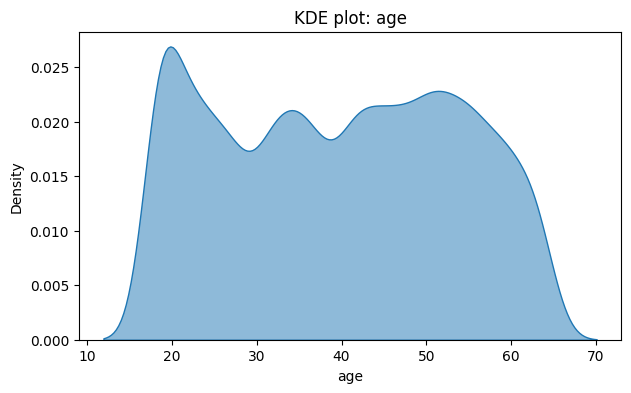

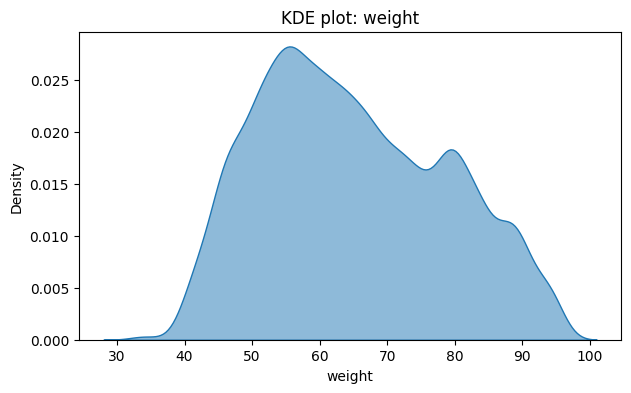

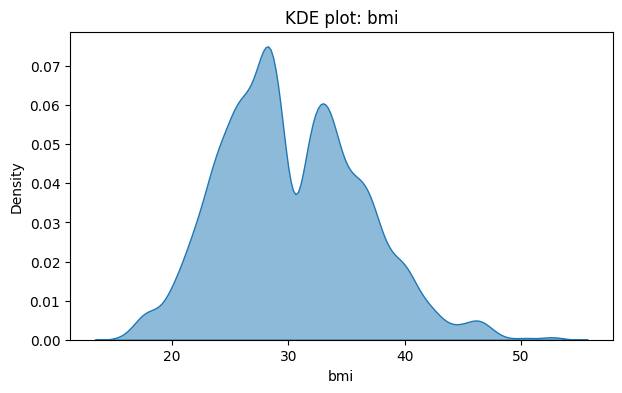

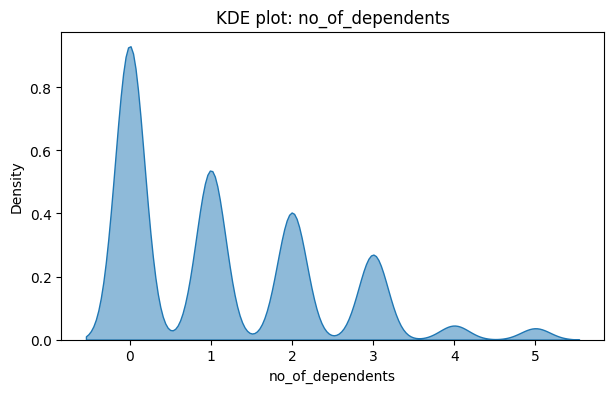

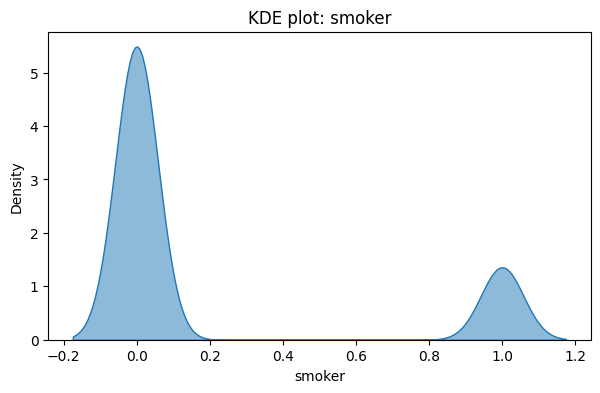

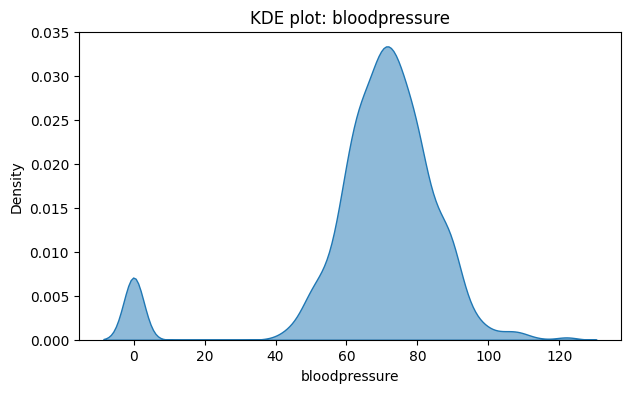

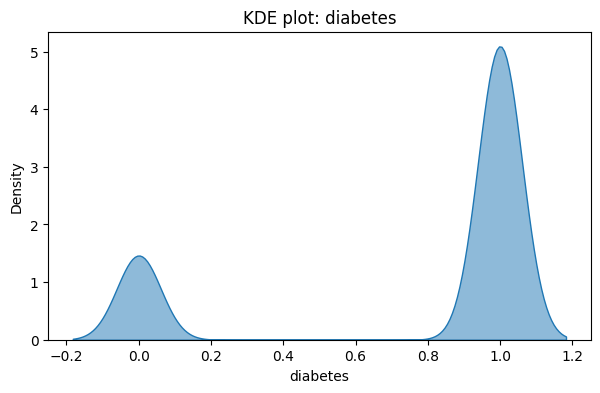

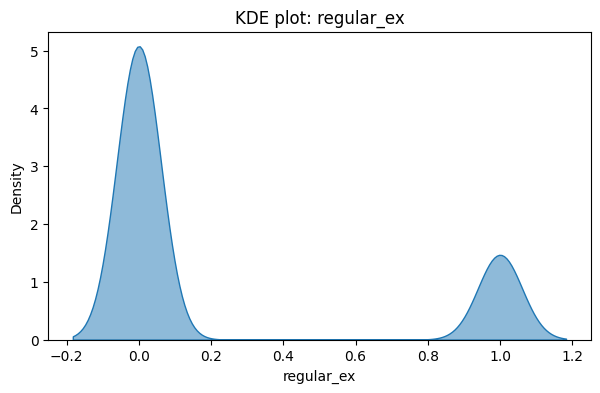

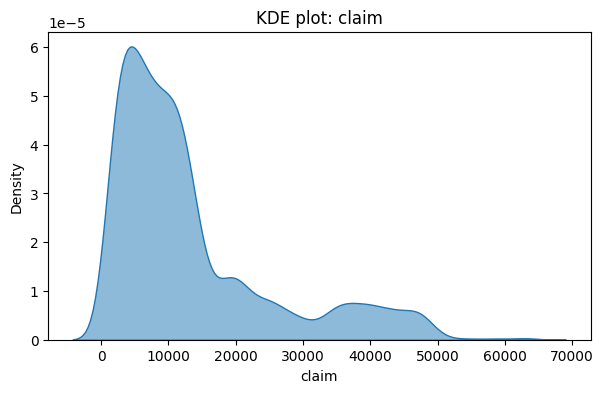

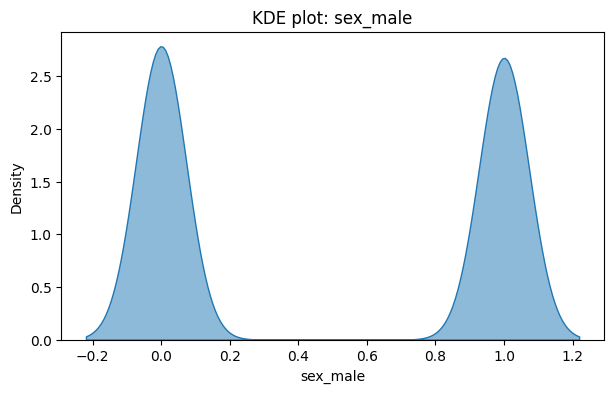

In [63]:
plot_KDE_plot(df_health_demographics_claims)

#### Few Observations
- **Age:** Evenly spread, with most individuals in their 20s.
- **Weight & BMI:** Majority fall within 50-60 kg and a normal BMI range, but some individuals are obese with high BMI values.
- **Dependents:** Most individuals have no dependents, but a significant number have 1 to 5 dependents.
- **Smoking:** The dataset consists mostly of non-smokers, with comparatively fewer smokers.
- **Blood Pressure:** Follows a Gaussian distribution, with a mean around 75. Some values are 0, likely due to missing or unrecorded data.
- **Diabetes:** Majority of individuals are diabetic, with fewer non-diabetics. This might correlate with regular exercise, as most do not exercise regularly, and only a few follow a consistent routine.
- **Gender Distribution:** Equal number of males and females in the dataset.
- **Claims:** Well distributed, with most claims being around 20,000.

Next, I want to see if there is any relationship between hereditary_diseases and job_title.

For now, I will ignore the column 'city' as there are many values in it.

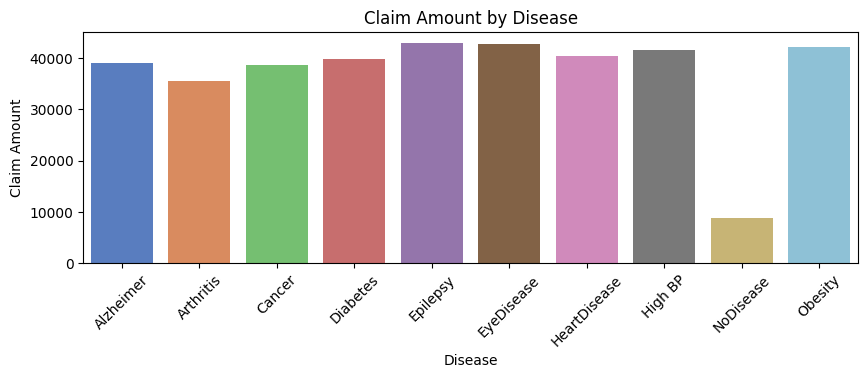

In [64]:
# Groupby disease and calculate the median claim amount and plot it
temp_median_claims = df_health_demographics_claims.groupby('hereditary_diseases')['claim'].median().reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(data=temp_median_claims, x='hereditary_diseases', y='claim', palette='muted')
plt.xlabel("Disease")
plt.ylabel("Claim Amount")
plt.title("Claim Amount by Disease")
plt.xticks(rotation=45)
plt.show()

No Disease has a very low claim amount compared to all other categories, which might indicate that people without a diagnosed disease claim far less insurance (as expected!). 

I will encode and have value = 0 if Hereditary Disease = NoDisease, else, will have value = 1 for others.

In [65]:
df_health_demographics_claims['is_hereditary_diseases'] = df_health_demographics_claims['hereditary_diseases'].apply(lambda x: 0 if x == 'NoDisease' else 1)
df_health_demographics_claims.head()

,age,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,sex_male,is_hereditary_diseases
0,60.0,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,1,0
1,49.0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,0,0
2,32.0,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,0,1
3,61.0,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,0,0
4,19.0,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,0,0


Next, I will group by job title and see if the claims vary.

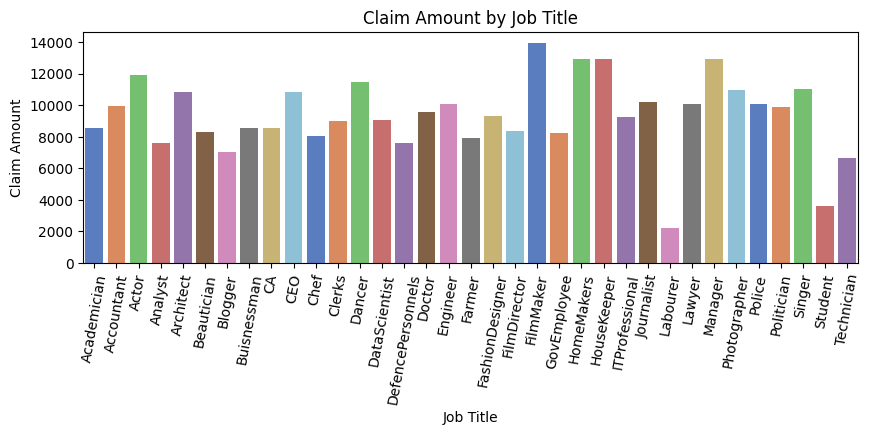

In [66]:
# Groupby job title and calculate the median claim amount and plot it
temp_median_claims = df_health_demographics_claims.groupby('job_title')['claim'].median().reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(data=temp_median_claims, x='job_title', y='claim', palette='muted')
plt.xlabel("Job Title")
plt.ylabel("Claim Amount")
plt.title("Claim Amount by Job Title")
plt.xticks(rotation=80)
plt.show()

#### Observation:
- High-earning professionals like Film Directors, Lawyers, and Government Employees looks like have higher claims due to expensive medical treatments, lifestyle-related health risks or premium insurance plans.

- Physically demanding jobs (e.g., Labourers, Technicians) surprisingly do not have the high claims, which might indicate better workplace insurance coverage or fewer expensive medical treatments.

- Students have very low claim amounts, likely because they are young, healthier, or covered under family plans.

Since there is no other interesting grouping in claim amounts across job titles, I am ignoring this variable for now. 

In [67]:
df_health_demographics_claims.drop(columns=['hereditary_diseases', 'city', 'job_title'], inplace=True)
df_health_demographics_claims.head()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,is_hereditary_diseases
0,60.0,64,24.3,1,0,72,0,0,13112.6,1,0
1,49.0,75,22.6,1,0,78,1,1,9567.0,0,0
2,32.0,64,17.8,2,1,88,1,1,32734.2,0,1
3,61.0,53,36.4,1,1,72,1,0,48517.6,0,0
4,19.0,50,20.6,0,0,82,1,0,1731.7,0,0


<Figure size 1000x1000 with 0 Axes>

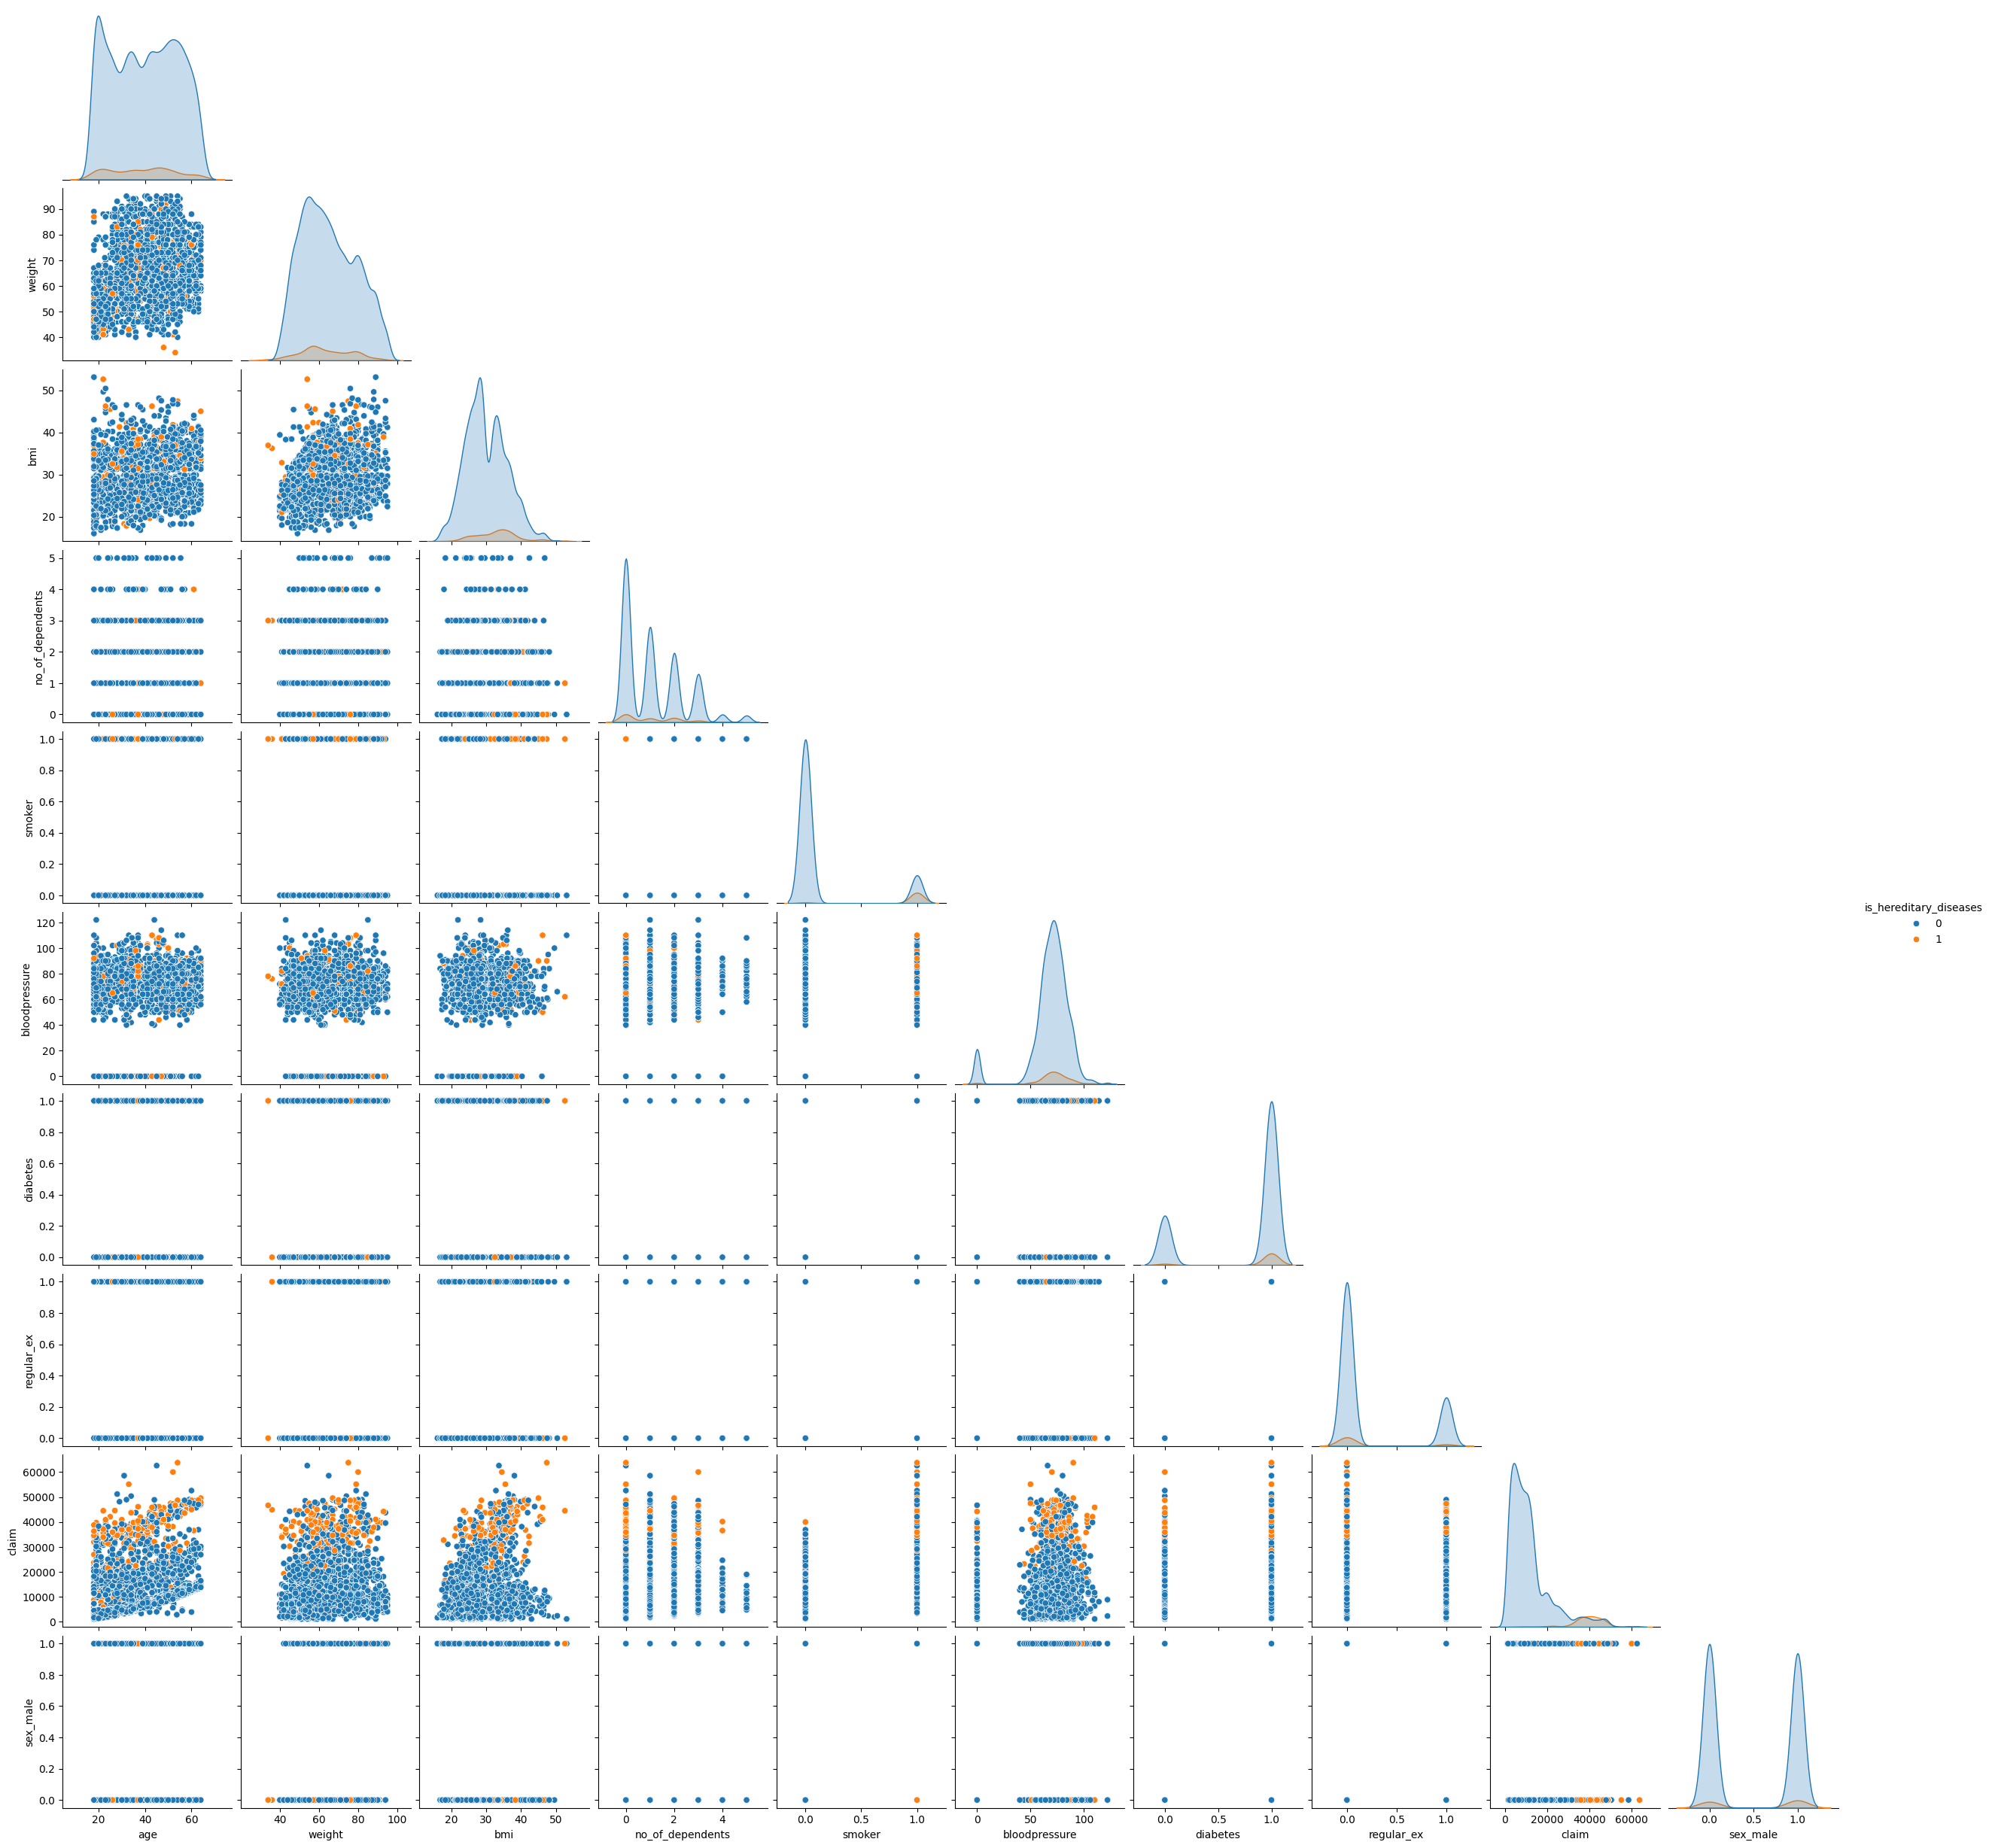

In [ ]:
# plot_pairplot(df_health_demographics_claims, hue='is_hereditary_diseases')

Age-Claims and BMI-Weight (as expected, since BMI includes Weight in it's calculation) somewhat some relationship? Others, maybe doesn't!

Let me see how well each are correlated.

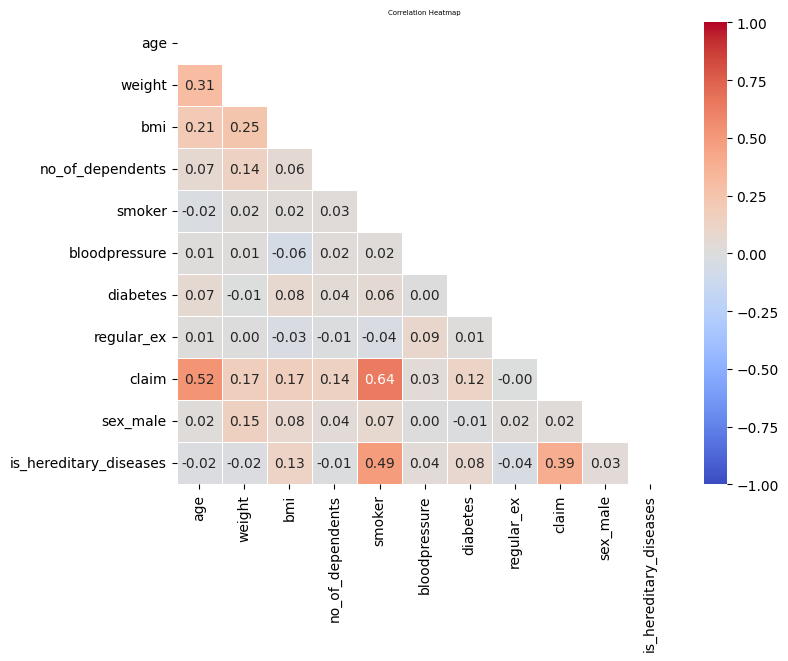

In [69]:
plot_correlation_heatmap(df_health_demographics_claims)

#### Correlations with Claims
- **Strong Positive Correlation:** Smokers (0.64) tend to have higher claim amounts. Age (0.52) also seems to be highly correlated with claim
- **Moderate Positive Correlation:** People with hereditary diseases (0.39) have moderately higher claims.
- **Weak Positive Correlation:** Slight increase in claims with higher weight and BMI (0.17), no_of_dependents (0.14) and diabetes (0.12).
- **Very Weak Correlation:** bloodpressure, regular_ex, and sex show minimal correlation with claims.

Interestingly, there is only a weak relationship between weight and BMI (Spearmann's correlation coefficient = 0.25)!

Now I will check if they are significant enough.

In [70]:
columns_to_check_significance = ['smoker', 'age', 'is_hereditary_diseases', 'weight', 'bmi', 'no_of_dependents', 'diabetes']
for col in columns_to_check_significance:
    corr, p_value = spearmanr(df_health_demographics_claims[col], df_health_demographics_claims['claim'])
    print(f"\n{col} - claim:")
    if p_value == 0.0:
        log_p_value = np.log10(np.finfo(float).eps)
        print(f"Spearman Correlation: {corr}")
        print(f"P-value is smaller than 10^{log_p_value:.2f}")
    else:
        print(f"Spearman Correlation: {corr}")
        print(f"P-value: {p_value}")


smoker - claim:
Spearman Correlation: 0.6371366943045187
P-value is smaller than 10^-15.65

age - claim:
Spearman Correlation: 0.523837245100115
P-value is smaller than 10^-15.65

is_hereditary_diseases - claim:
Spearman Correlation: 0.3945236588678504
P-value is smaller than 10^-15.65

weight - claim:
Spearman Correlation: 0.16909487239295018
P-value: 1.277518467218224e-96

bmi - claim:
Spearman Correlation: 0.16626192970605433
P-value: 1.9827811095898874e-93

no_of_dependents - claim:
Spearman Correlation: 0.1356264400917613
P-value: 1.6419989290893544e-62

diabetes - claim:
Spearman Correlation: 0.12212333875073396
P-value: 6.130422264468983e-51


Seems like all these relationships are significant enough and indeed are related to 'claim'.

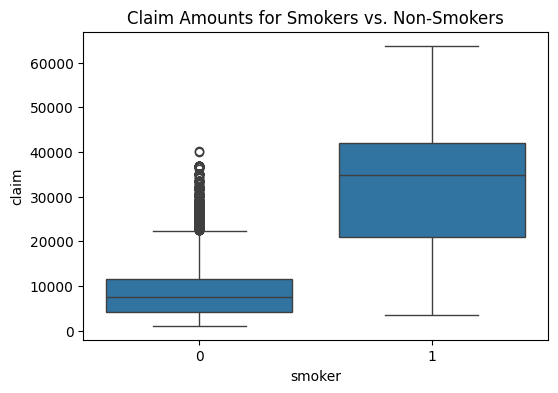

In [71]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_health_demographics_claims['smoker'], y=df_health_demographics_claims['claim'])
plt.title("Claim Amounts for Smokers vs. Non-Smokers")
plt.show()

There is a significant difference in the claims received by Smokers vs Non-Smokers. 

Now let me see how age and claims received are related!

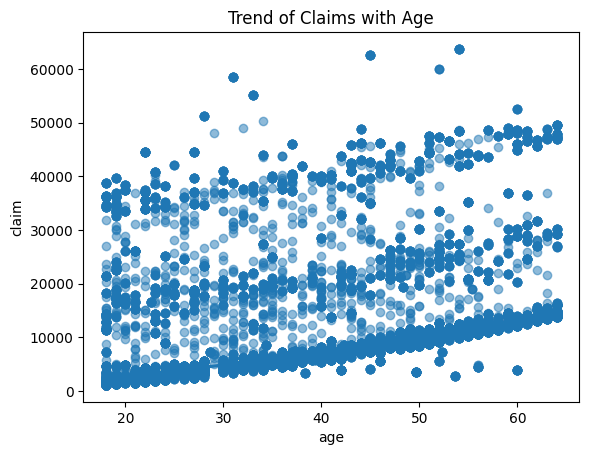

In [72]:
sns.regplot(x=df_health_demographics_claims['age'], y=df_health_demographics_claims['claim'], scatter_kws={"alpha": 0.5}, lowess=True)
plt.title("Trend of Claims with Age")
plt.show()

- It looks like with increasing age, individuals are filing for more claims. 
- However, there is still a significant variation in claim amounts across all ages - suggesting that claims can be highly variable even within the same age group.
- The minimum claim values appear to increase with age, i.e., younger individuals tend to have lower claim amounts while older individuals might have a higher minimum claim threshold.

Let me now bin (my median) and see if I can visualize differences clearly.


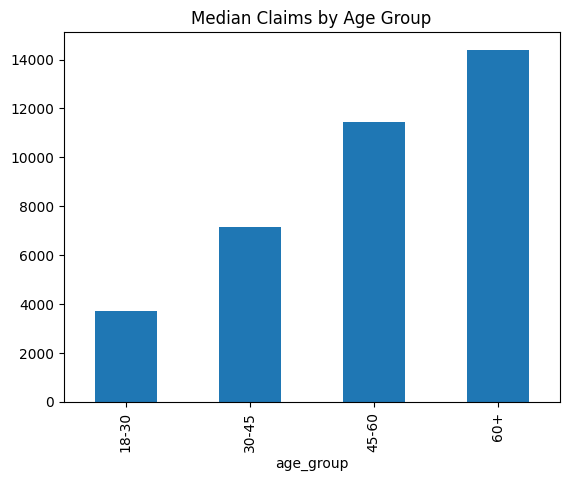

In [ ]:
df_health_demographics_claims['age_group'] = pd.cut(df_health_demographics_claims['age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '30-45', '45-60', '60+'])
df_health_demographics_claims.groupby('age_group')['claim'].median().plot(kind='bar')
plt.title("Median Claims by Age Group")
plt.show()

Definaely there is! Individuls between 18-30 yrs, usually file and receive less than 4000 claims, whereas, it is 4X for 60+yrs individuals.

Let us also observe if there is a significant difference between number of smokers vs non smokers across these age bins and if the ones who dont smoke receive lesser claims.

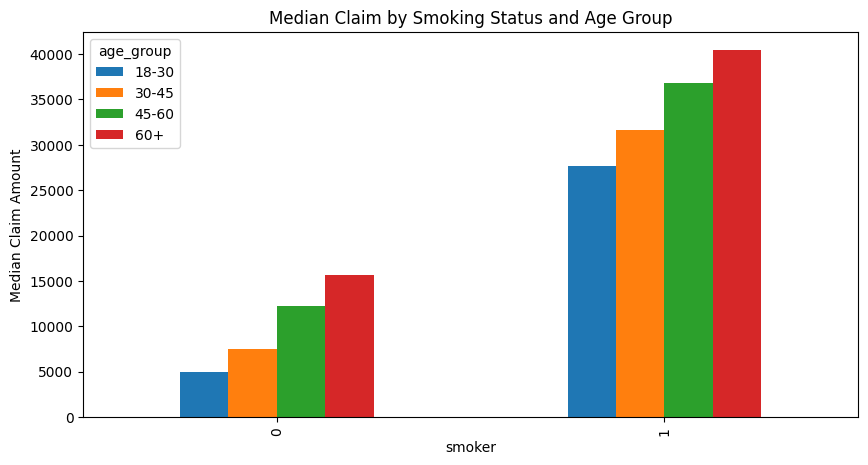

In [74]:
df_health_demographics_claims.groupby(['smoker', 'age_group'])['claim'].mean().unstack().plot(kind='bar', figsize=(10,5))
plt.title("Median Claim by Smoking Status and Age Group")
plt.ylabel("Median Claim Amount")
plt.show()

Yes! We are right. People who dont smoke file for 2X less claims than those who smnoke. 

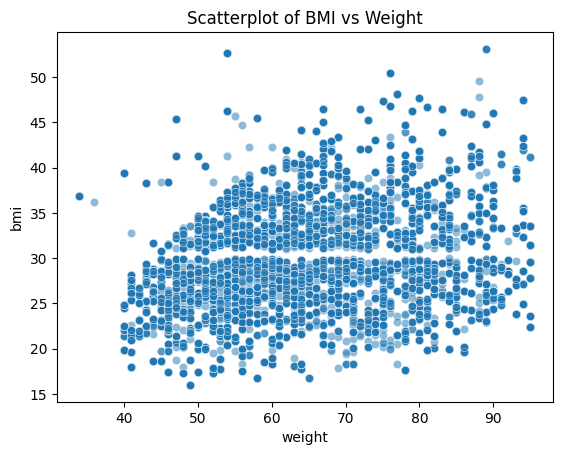

In [75]:
sns.scatterplot(x=df_health_demographics_claims['weight'], y=df_health_demographics_claims['bmi'], alpha=0.5)
plt.title("Scatterplot of BMI vs Weight")
plt.show()

Since BMI depends on both weight and height, 
BMI = (weight(kg))/(height(m)^2)

Probably, in this case, height is really varying across individuals (BMI values for the same weight can be very different) - hence, we don't have a good correlation/clear trend between weight - and BMI.

### 4.2 Demographics - Claims dataset

In [76]:
df_demographics_claims.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset seems to be similar to the one we analyzed previously - We don't have a few columns (like, the is_herediatry_diseases/anything health related & that which mentioned the specific city). Instead, we have the grouping based on US region and number of children in this dataset (before one was, number of dependents).

In [77]:
# we have some categorical columns. I want to see the unique values of these columns
temp_columns_unique_values = ["sex", "smoker", "region"]
for col in temp_columns_unique_values:
    print(df_demographics_claims[col].unique(), "\n")

['female' 'male'] 

['yes' 'no'] 

['southwest' 'southeast' 'northwest' 'northeast'] 



Next, I will one-hot encode the same.

In [78]:
df_demographics_claims = pd.get_dummies(df_demographics_claims, columns=['sex', 'smoker', 'region'], dtype=int)
df_demographics_claims.drop(columns=['sex_female', 'smoker_no', 'region_southeast'], inplace=True)
df_demographics_claims.rename(columns={'sex_male': 'is_sex_male', 
                                'smoker_yes': 'is_smoker_yes', 
                                'region_northeast': 'is_region_northeast', 
                                'region_northwest': 'isregion_northwest', 
                                'region_southwest':'is_region_southwest'}, inplace=True)
df_demographics_claims.head()

,age,bmi,children,charges,is_sex_male,is_smoker_yes,is_region_northeast,isregion_northwest,is_region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,0
2,28,33.000,3,4449.46200,1,0,0,0,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


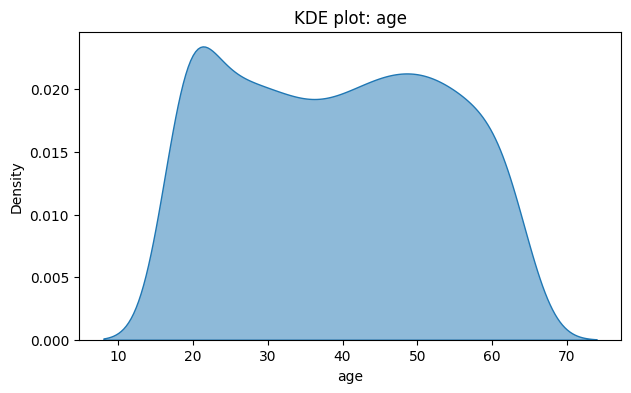

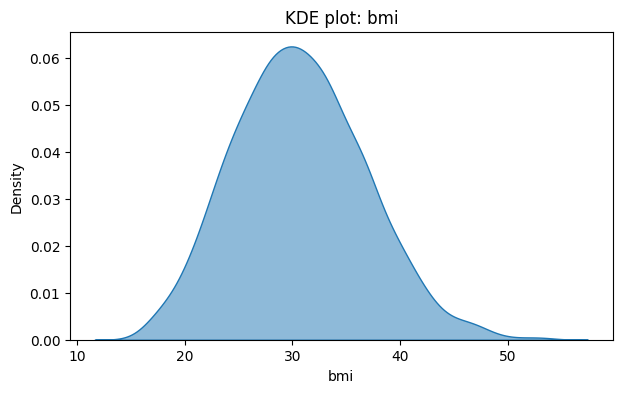

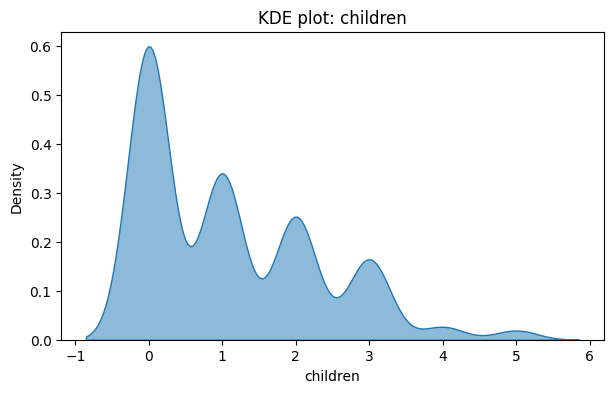

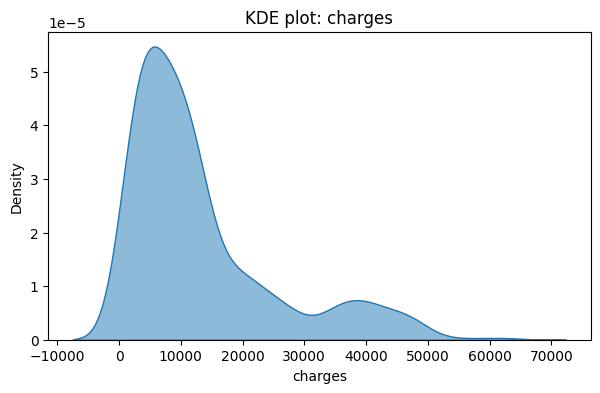

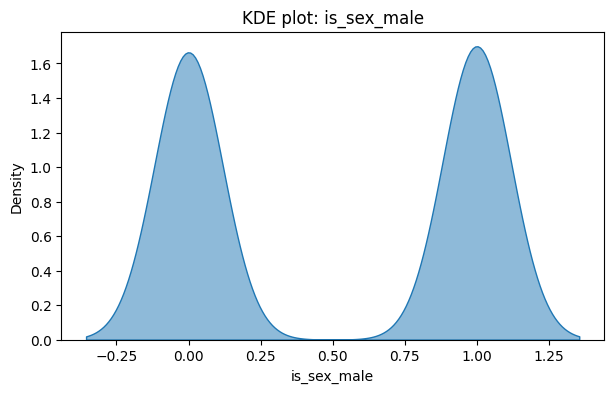

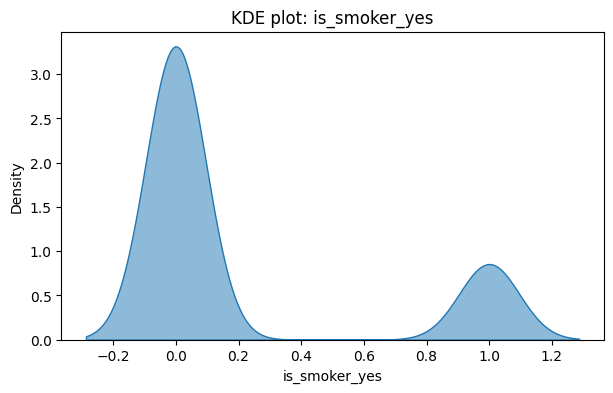

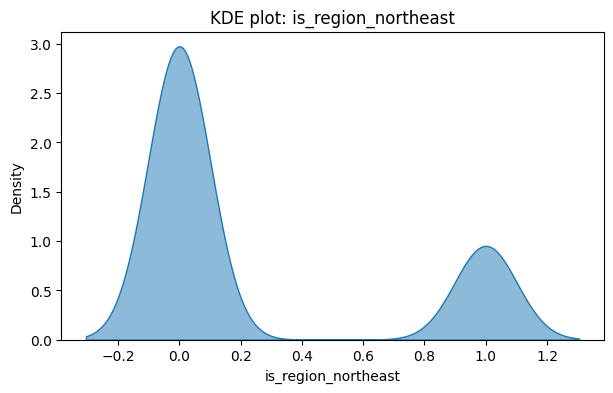

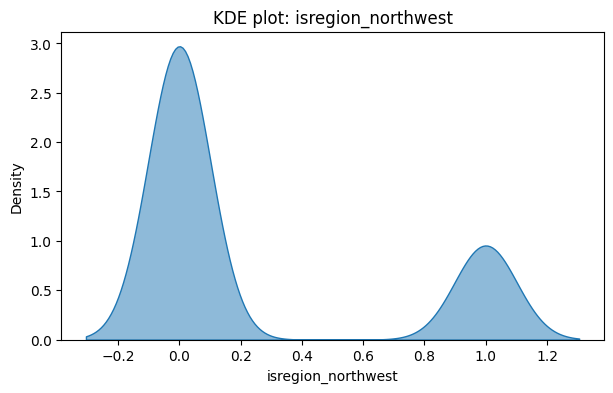

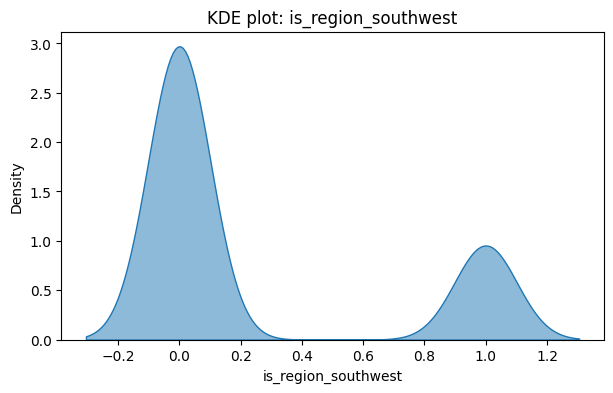

In [79]:
plot_KDE_plot(df_demographics_claims)

#### Few Observations
- **Age:** Evenly spread, with most individuals in their 20s or 50s/60s.
- **BMI:** Majority fall within the 30 BMI range. We have a good bell-shaped curve here. 
- **Children:** Most individuals have no dependents, but a significant number have 1 to 5 dependents.
- **Smoking:** The dataset consists mostly of non-smokers, with comparatively fewer smokers.
- **Gender Distribution:** Equal number of males and females in the dataset.
- **Region:** Looks like we have similar number of people from each of the US regions.

The observations are similar to what we saw with the previous dataset. Let us see if we can find out something new here!

<Figure size 1000x1000 with 0 Axes>

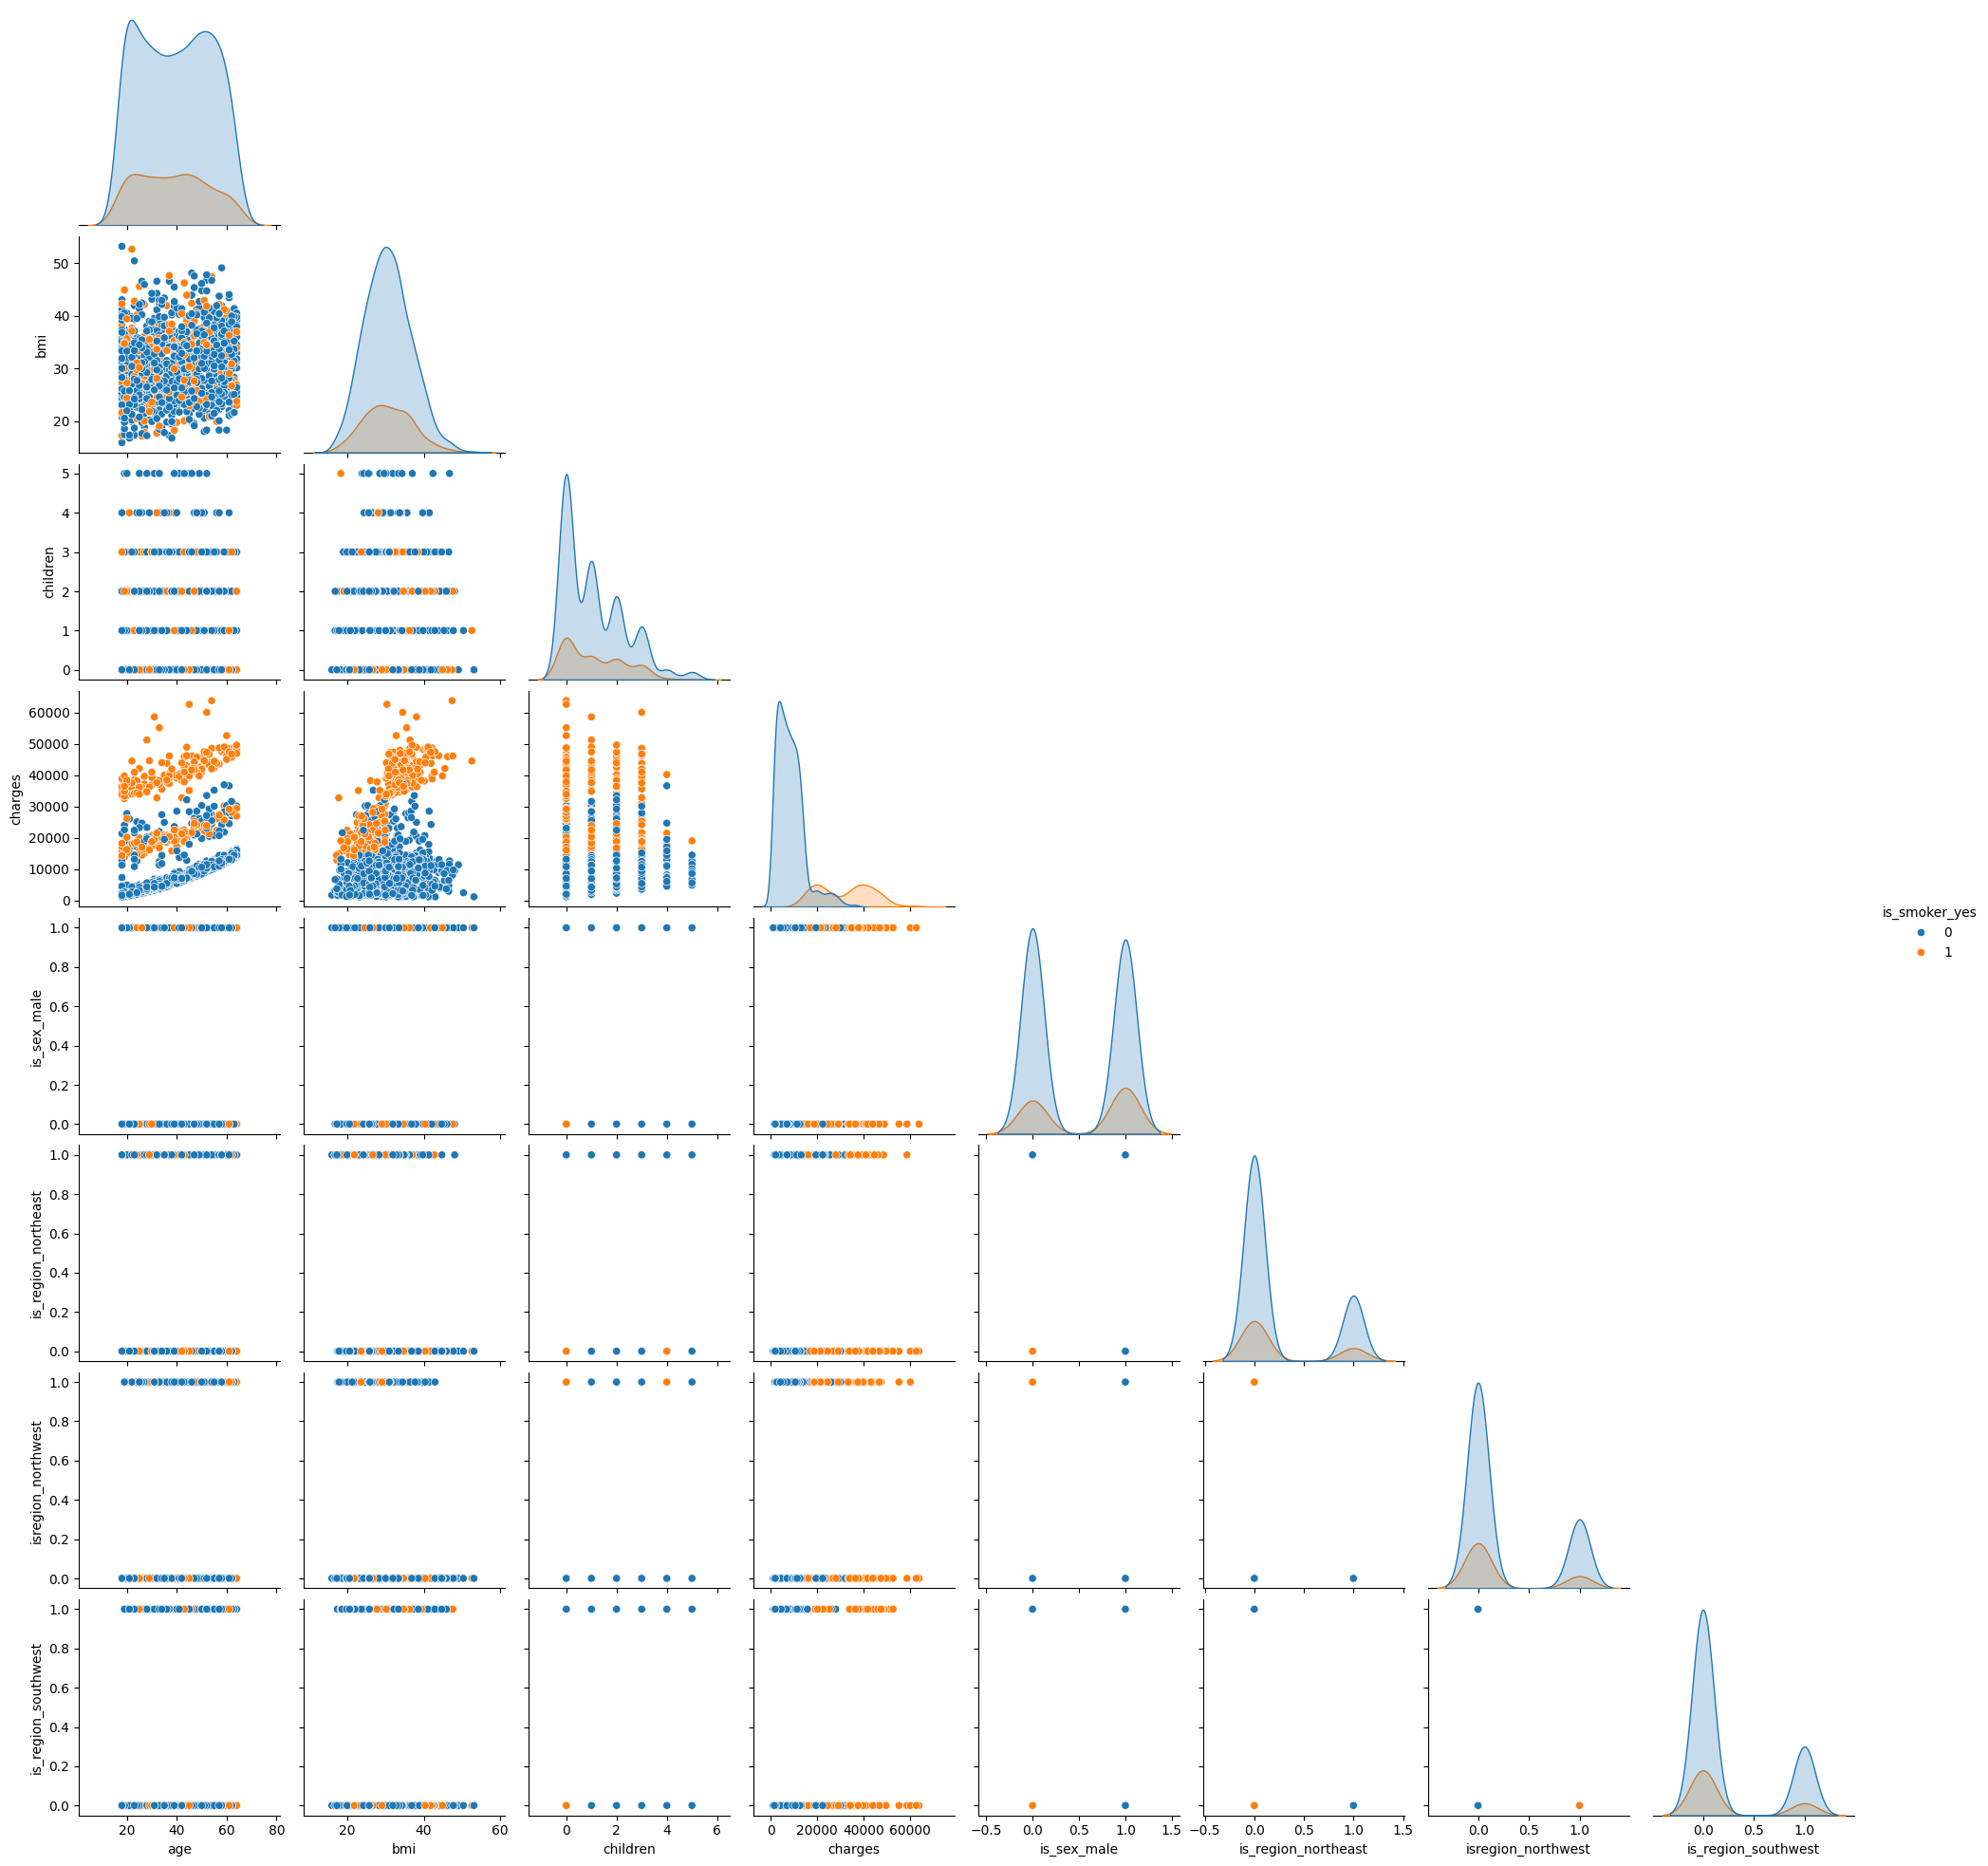

In [ ]:
# plot_pairplot(df_demographics_claims, hue='is_smoker_yes')

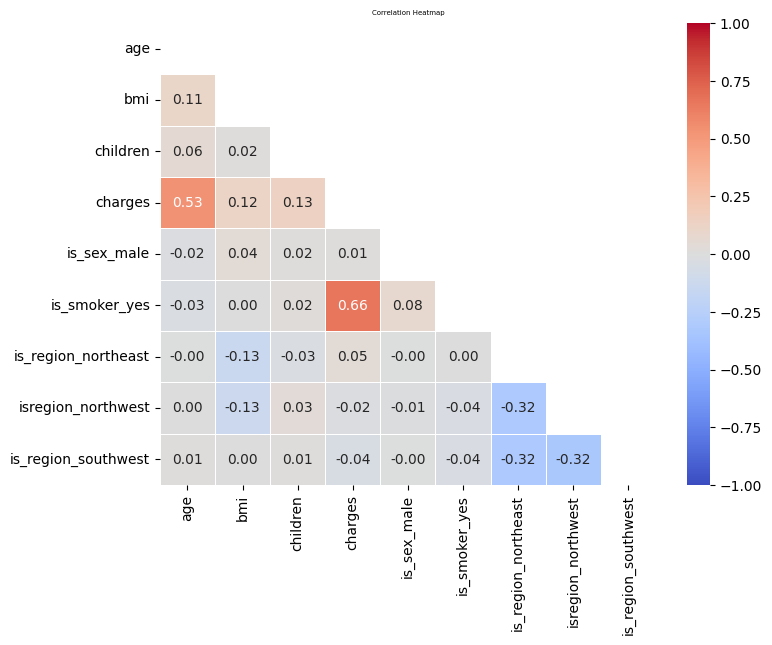

In [80]:
plot_correlation_heatmap(df_demographics_claims)

We have similar relationships and correlations as our previous dataset. This dataset is probably a cleaned version of the previous dataset (since, there are fewer values, and clear increasing trend in age-charges chart).

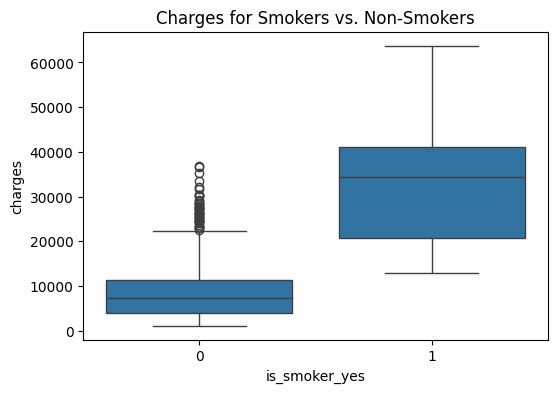

In [84]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_demographics_claims['is_smoker_yes'], y=df_demographics_claims['charges'])
plt.title("Charges for Smokers vs. Non-Smokers")
plt.show()

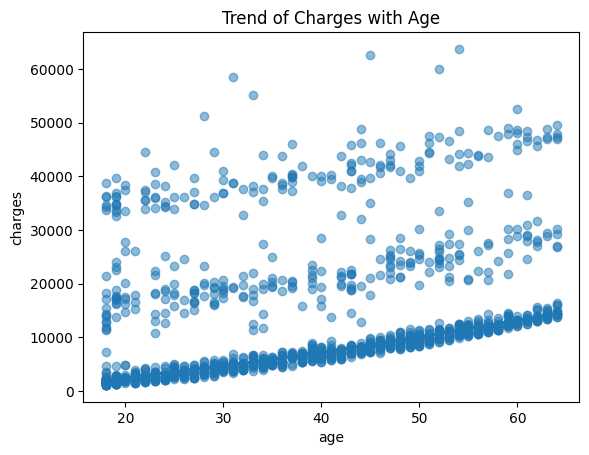

In [85]:
sns.regplot(x=df_demographics_claims['age'], y=df_demographics_claims['charges'], scatter_kws={"alpha": 0.5}, lowess=True)
plt.title("Trend of Charges with Age")
plt.show()

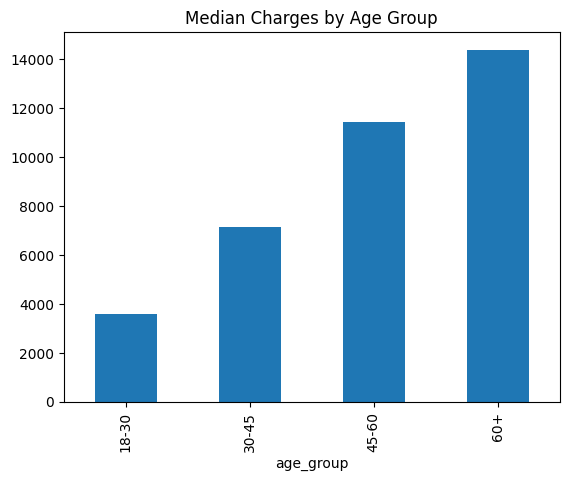

In [87]:
df_demographics_claims['age_group'] = pd.cut(df_demographics_claims['age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '30-45', '45-60', '60+'])
df_demographics_claims.groupby('age_group')['charges'].median().plot(kind='bar')
plt.title("Median Charges by Age Group")
plt.show()

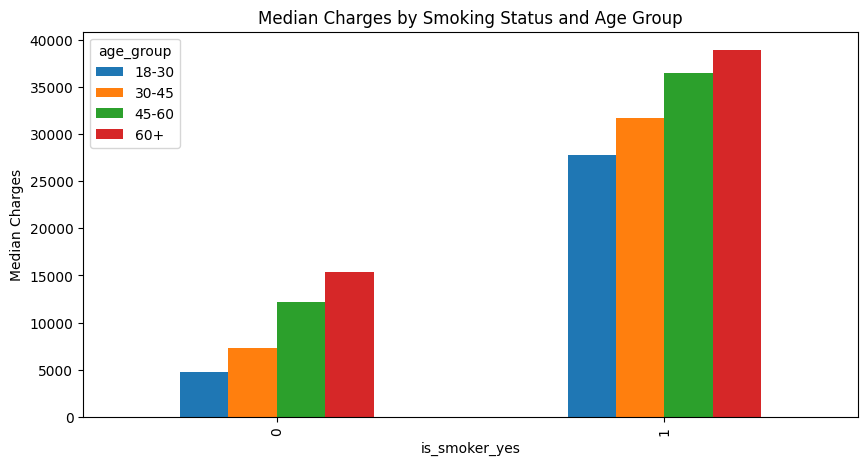

In [90]:
df_demographics_claims.groupby(['is_smoker_yes', 'age_group'])['charges'].mean().unstack().plot(kind='bar', figsize=(10,5))
plt.title("Median Charges by Smoking Status and Age Group")
plt.ylabel("Median Charges")
plt.show()

In [92]:
df_demographics_claims.shape

(1338, 10)

The observations are exactly similar to what we observed with dataset1 previously. Just that, the age-charges plot looks very cleaned (Probably some sort of filtering was performed, the number of rows in this dataset too seem to be less than the previous one).

Let me once also clearly see the BMI - charges relation.

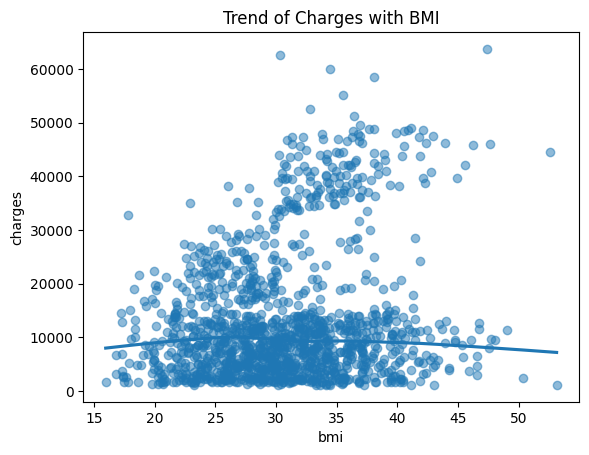

In [94]:
sns.regplot(x=df_demographics_claims['bmi'], y=df_demographics_claims['charges'], scatter_kws={"alpha": 0.5}, lowess=True)
plt.title("Trend of Charges with BMI")
plt.show()

Yes, I was right, people with higher BMI, tends to claim/file for higher insurance. 

From the pair plot, I can see that most of them with higher insurance charges also smoke. 

Age, BMI, and smoking behaviors - are definately something that makes individuals file for more insurance.

### 4.3 Demographics Dataset

In [107]:
print(df_demographics.shape)
df_demographics.head(20)

(41, 17)


,year,all,white,black,hispanic,men,white_men,black_men,hispanic_men,women,white_women,black_women,hispanic_women,high_school,bachelors_degree,recent_high-school_graduate,recent_college_graduate
0,2019,53.8,58.0,52.6,41.4,56.8,62.0,53.8,42.4,50.4,53.2,51.5,40.0,46.9,63.2,16.3,37.0
1,2018,52.6,56.8,51.1,39.8,55.1,60.2,51.8,40.9,49.6,52.6,50.4,38.3,46.0,62.5,14.3,41.6
2,2017,54.0,57.3,52.1,43.0,57.1,61.4,53.6,44.4,50.2,52.4,50.8,41.1,47.6,64.1,15.8,37.0
3,2016,53.1,56.7,51.2,41.6,56.6,60.8,52.2,44.2,49.0,51.8,50.3,38.1,47.9,62.8,15.6,34.1
4,2015,52.7,56.3,50.0,41.2,55.9,60.5,51.0,42.6,48.8,51.3,49.1,39.2,47.1,63.5,17.5,36.8
5,2014,52.8,56.9,50.8,39.3,56.3,61.7,53.3,40.2,48.6,51.2,48.5,38.1,47.4,63.3,15.4,40.1
6,2013,52.7,57.1,50.0,37.3,55.5,61.6,50.1,36.7,49.3,51.9,50.0,38.4,47.7,64.3,17.0,45.1
7,2012,51.6,56.3,48.5,35.6,54.2,60.4,47.8,35.2,48.6,51.5,49.1,36.2,45.2,64.5,12.3,38.3
8,2011,52.3,56.9,50.0,35.8,55.4,61.5,50.3,35.5,48.6,51.5,49.7,36.1,46.9,65.0,13.2,38.1
9,2010,53.1,57.8,49.5,36.5,55.8,62.5,48.9,34.9,49.9,52.3,50.0,39.0,47.9,66.4,11.8,48.9


Let us observe the percentage of employees working in private companies who receive health insurance through their employer Employer-sponsored health insurance (ESI) coverage, and/or if there is any ethinicity trend and/or trends among college/high school graduates.

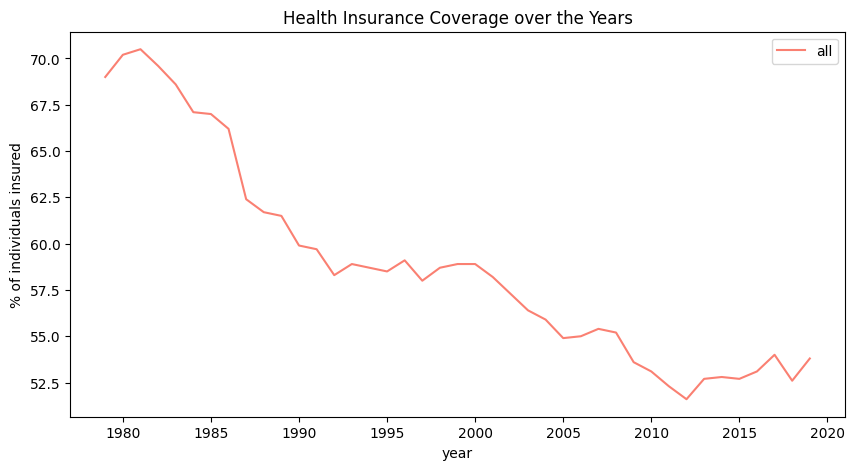

In [104]:
df_demographics.plot(kind='line',
                     x='year',
                     y='all',
                     color='salmon',
                     figsize=(10, 5))
plt.title("Health Insurance Coverage over the Years")
plt.ylabel(f"% of individuals insured")
plt.show()

Oh wow! I did not expect this. Upon Googling why we see a descending trend, I now know that:
- **1979 - 1995**: [Source](https://doi.org/10.1377/hlthaff.18.2.30)
    - The primary reason for the decline in insurance coverage was that healthcare costs increased much faster than personal income. From 1979 to 1995, real personal income remained mostly flat, while per capita health expenditures increased by 60%. As a result, health insurance became unaffordable for many low-income workers.
    - Due to the rising costs, fewer employers offered health insurance benefits due to rising costs. Some employers stopped contributing to insurance plans or shifted more costs onto employees. Employers faced a trade-off between wages and benefits - as health insurance costs increased, some chose to pay higher wages instead of offering insurance.
    - The workforce shifted toward jobs that were less likely to provide health insurance (According to the authors, this is not the biggest factor - the rising healthcare costs still top factor.), including:
        - Part-time jobs (which often don’t offer benefits).
        - Self-employment (fewer employer-sponsored plans).
        - Small businesses (less likely to offer health insurance).
        - Service industries (tend to provide fewer benefits).
    - More workers earned low wages, making it difficult for them to afford private health insurance. Even though overall income inequality increased, real income remained mostly unchanged for middle-income workers. Since wages didn’t grow as fast as health costs, insurance became too expensive for many workers.
    - Premiums increased, forcing some workers to opt out of employer-sponsored health plans. Employers reduced their share of premium payments, shifting more costs onto employees. As costs increased, many workers—especially low-income individuals—chose to go uninsured instead.
    - Medicaid expansions in the late 1980s and early 1990s helped some low-income workers. However, some employers and employees dropped private insurance in favor of Medicaid. This "crowd-out effect" may have slightly contributed to the decline in employer-sponsored insurance.
    - Periods of economic downturns (e.g., early 1980s, early 1990s) led to job losses. Many unemployed workers lost their health insurance. Even after recessions ended, coverage levels did not fully recover.
    - The rising complexity of insurance plans (e.g., managed care, HMOs) made it harder for some workers to access affordable options. The cost of administration, profit margins, and insurance company risk management also contributed to higher premiums.
- **1990s - early 2000s**: [Source](https://pmc.ncbi.nlm.nih.gov/articles/PMC1361195/#:~:text=More%20than%20half%20of%20the,percentage%20point%20increase%20in%20coverage.)
    - The main driver of the decline in health insurance coverage after the 1990s was rising healthcare costs. Employer-sponsored insurance (ESI) became more expensive, leading some employers to stop offering coverage. Employees faced higher out-of-pocket costs, making them more likely to opt out of employer-sponsored plans. 
    - Recessions in the early 1990s and 2000s led to job losses, meaning many people lost employer-sponsored insurance. More jobs moved towards low-wage industries that did not offer coverage. The gig economy (freelance and contract work) expanded, and these jobs typically lack health benefits.
    - Some tax benefits for employer-sponsored insurance weakened, making it less attractive for companies to offer health benefits.  Employers increased cost-sharing by requiring employees to pay higher deductibles and copayments, making insurance less affordable.
    - The workforce became more diverse, with a higher share of:
        - Nonwhite workers (who historically had lower access to employer-sponsored insurance)
        - Female-headed households (who often had fewer employer-provided benefits).
        - Immigrants (who may work in jobs that don’t provide health insurance).
    - The cost of medical care and new technologies increased significantly. Premiums rose, as insurers passed these costs onto employers and employees. Some individuals chose to remain uninsured because health insurance was too expensive. As premiums rose, healthier individuals (especially young workers) dropped insurance. This led to adverse selection, where only sicker people remained insured, driving costs even higher. This cycle made individual market plans more expensive, reducing overall coverage.
- **2000s**: [Source](https://pmc.ncbi.nlm.nih.gov/articles/PMC3423174/)
    - Between 2000 and 2008, employer-sponsored insurance (ESI) fell by 6 percentage points (apparantly in the paper, authors state: from 68.1% to 61.8%). In the chart plotted above, it was only a 3.7% fall (58.9% to 55.2%). Probably need to revaluate the accuracy of this dataset.
    - The drop in policyholder coverage (from 34.6% to 31.5%) and dependent coverage (from 33.5% to 30.3%) both contributed to decrease in ESI.
    - In smaller firms where there were less than 100 employees, coverage decline was driven by fewer employers offering insurance and lower take-up rates by employees. Small businesses were less likely to offer coverage due to rising costs. Employees in small firms struggled to afford premiums, leading to lower take-up rates.
    - In larger firms where there were more than 100 employees, the decline was not due to employers dropping insurance; offer rates were stable. However, employee take-up rates decreased, meaning more employees chose not to enroll in employer plans. This suggests that even when insurance was offered, rising employee contributions discouraged enrollment.
    - Enrollment shifted toward single coverage, meaning more employees chose to only insure themselves instead of adding family members.
        - Employee contributions for employee-plus-one plans nearly doubled between 2001 and 2008.
        - Employers were covering less of dependent costs, forcing employees to pay more.
        - More dependents (children) became eligible for public health insurance, reducing reliance on employer-based dependent coverage.
        - According to the Authors: Employee contributions for single coverage rose from $507 (2000) to $701 (2008). Contributions for employee-plus-one coverage nearly doubled, from $981 to $1,858. That means, more employees had to pay a share of premiums that was too high. Employers shifted more costs onto employees, making insurance less attractive. Some workers opted for public coverage (Medicaid, CHIP) or went uninsured.
        - Fewer small firms offered dependent coverage in 2008 compared to 2000. More employers offered "employee-plus-one" plans, but take-up of these plans declined (except in large firms). Family coverage became less common, especially in small businesses.
- **2008 - 2019**: [Source-1](https://www.commonwealthfund.org/publications/2019/nov/trends-employer-health-care-coverage-2008-2018), [Source-2](https://meps.ahrq.gov/data_files/publications/st543/stat543.shtml), [Source-3](https://www.meps.ahrq.gov/data_files/publications/st536/stat536.shtml), [Source-4](https://aspe.hhs.gov/sites/default/files/private/pdf/265041/trends-in-the-us-uninsured.pdf), [Source-5](https://pmc.ncbi.nlm.nih.gov/articles/PMC8579685/)



### 4.4 Demoghraphics Stats Dataset